In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data = pd.read_csv(r"amazon_alexa.tsv", delimiter= '\t', quoting = 3)
data.shape

(3150, 5)

In [5]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
data.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1
3149,4,29-Jul-18,Black Dot,Good,1


In [7]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [8]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [11]:
data['length'] = data['verified_reviews'].apply(len)

In [12]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [13]:
data['word_count']=data['verified_reviews'].apply(lambda x :len(str(x).split()))

In [14]:
data.head()

,rating,date,variation,verified_reviews,feedback,length,word_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197,38
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174,34
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1


In [15]:
data.describe()

,rating,feedback,length,word_count
count,3149.000000,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.714513,25.300730
std,1.067773,0.273332,182.541531,34.587753
min,1.000000,0.000000,1.000000,0.000000
25%,4.000000,1.000000,30.000000,6.000000
50%,5.000000,1.000000,74.000000,14.000000
75%,5.000000,1.000000,166.000000,32.000000
max,5.000000,1.000000,2853.000000,526.000000


In [16]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
word_count           int64
dtype: object

In [17]:
data['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

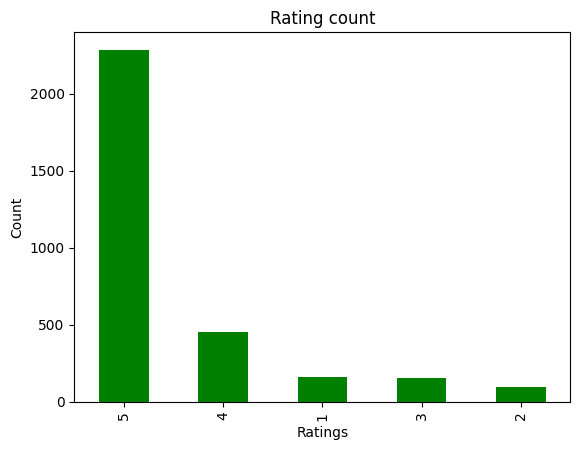

In [18]:
data["rating"].value_counts().plot.bar(color = 'green')
plt.title("Rating count")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

In [19]:
data['feedback'].isnull().sum()

0

In [20]:
data['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

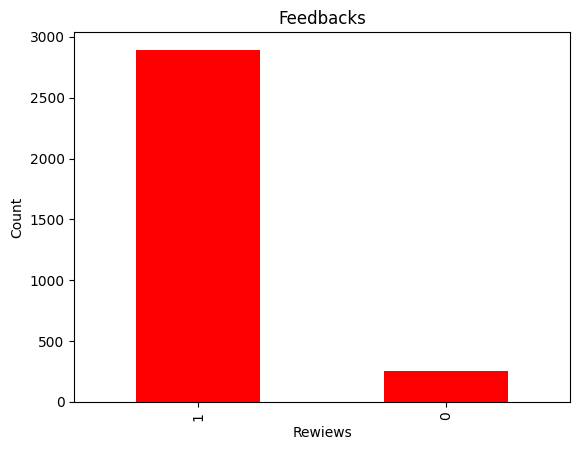

In [21]:
data['feedback'].value_counts().plot.bar(color= 'red')
plt.title("Feedbacks")
plt.xlabel("Rewiews")
plt.ylabel('Count')
plt.show()

In [22]:
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [23]:
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [24]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback', 'length',
       'word_count'],
      dtype='object')

In [25]:
data['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

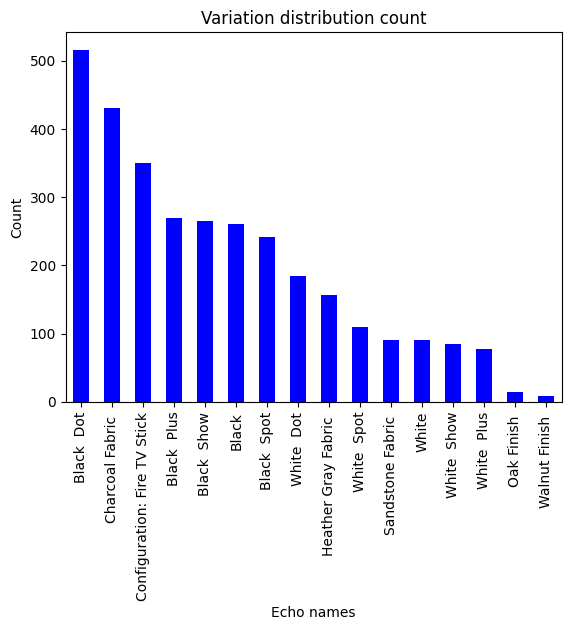

In [26]:
data['variation'].value_counts().plot.bar(color = 'blue')
plt.title('Variation distribution count')
plt.xlabel("Echo names")
plt.ylabel("Count")
plt.show()

In [27]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

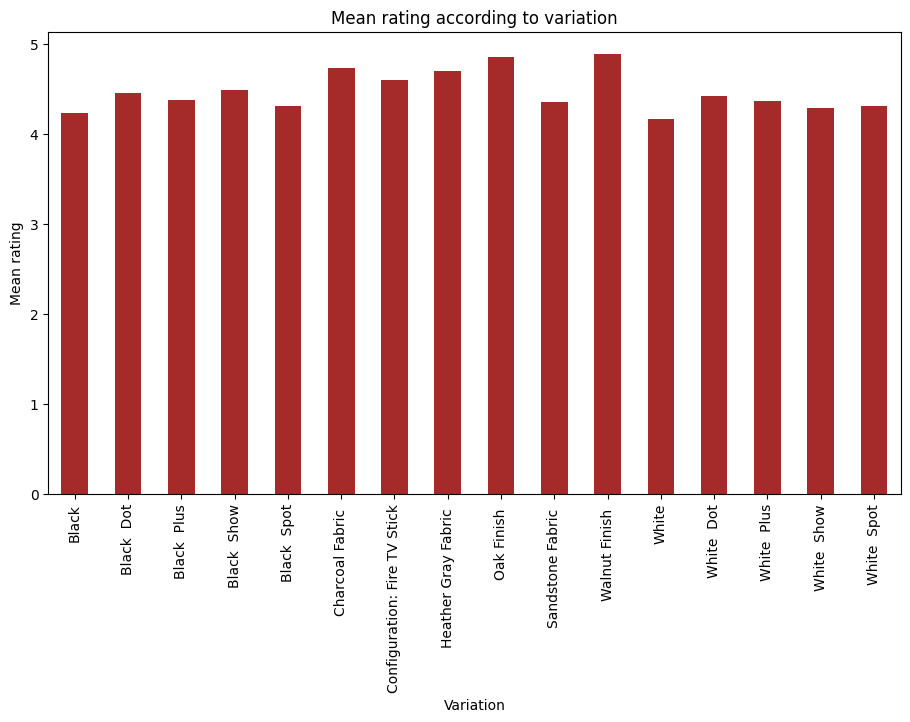

In [38]:
data.groupby('variation')['rating'].mean().plot.bar(color = 'brown', figsize = (11,6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

[Text(0.5, 1.0, 'Distribution of length of review ')]

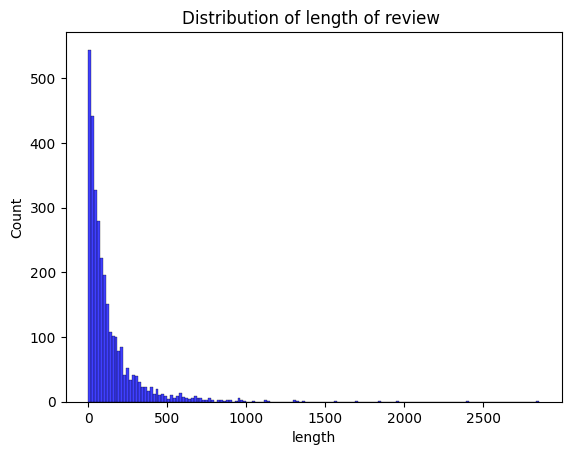

In [29]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of reviwe if feedback 0')]

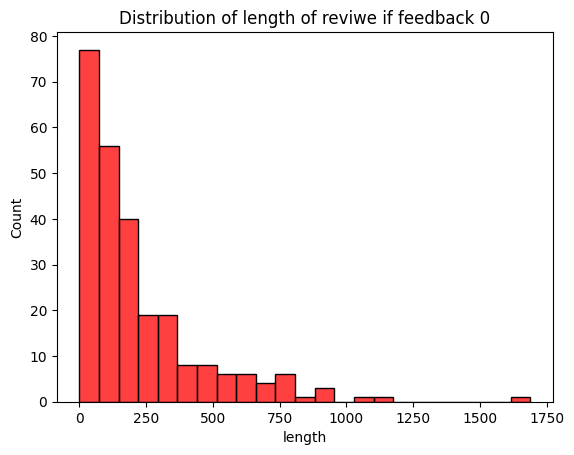

In [30]:
sns.histplot(data[data["feedback"]==0]['length'],color="red").set(title="Distribution of length of reviwe if feedback 0")

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

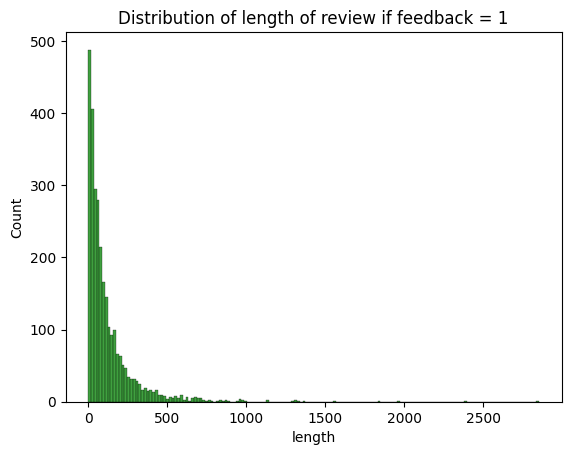

In [31]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

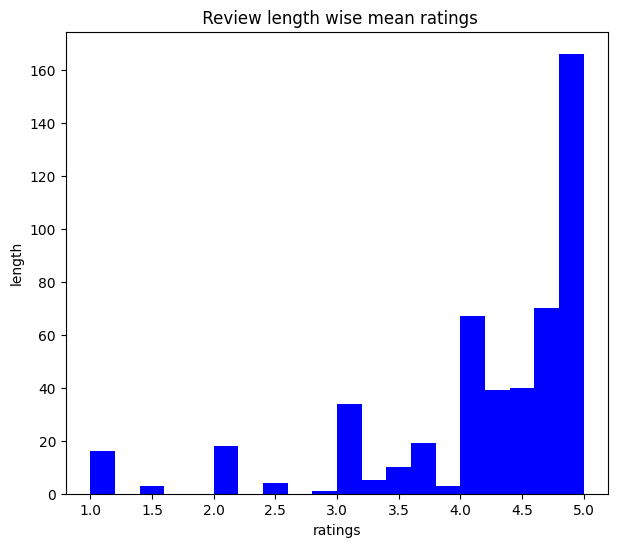

In [32]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
STOPWORDS = set(stopwords.words('english'))

In [36]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

In [51]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [52]:
from wordcloud import WordCloud

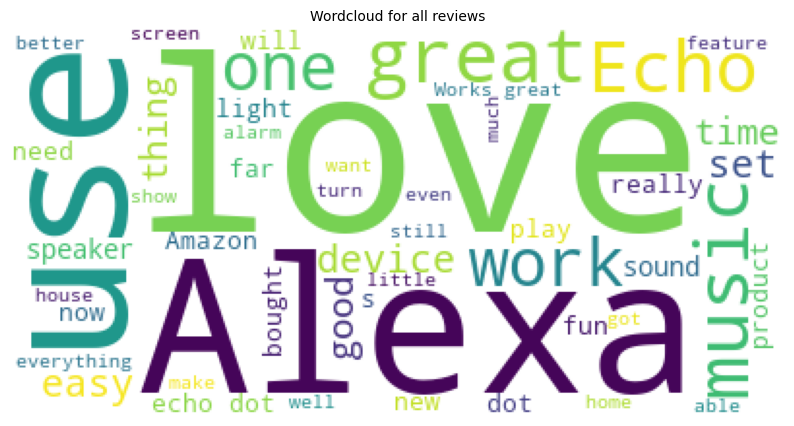

In [53]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [54]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

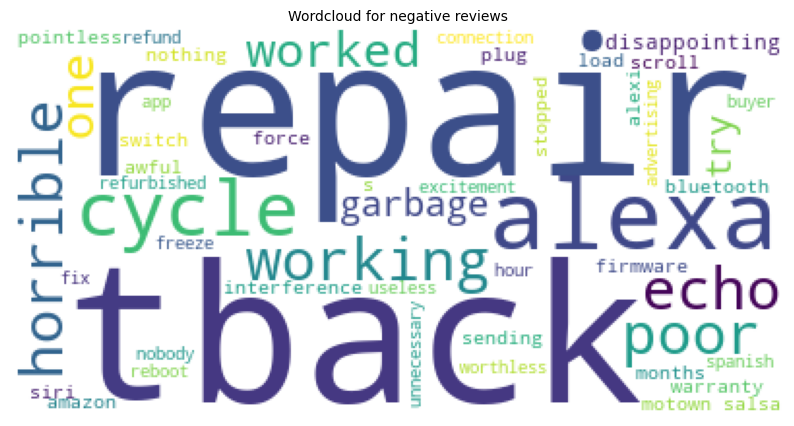

In [55]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

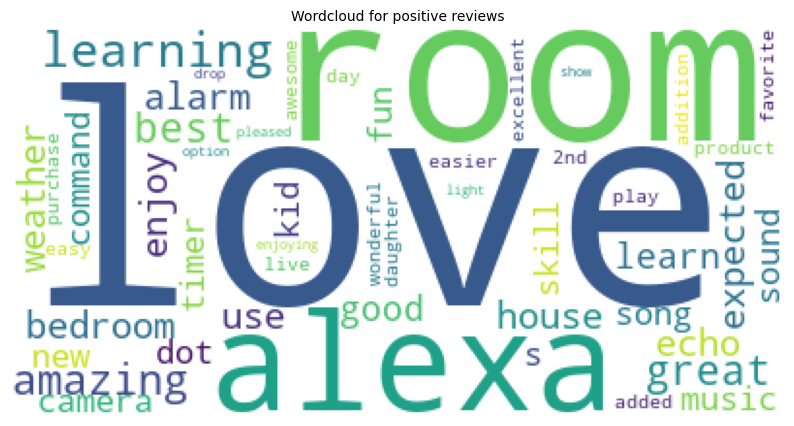

In [56]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [57]:
import re

In [58]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [59]:
data['processed_text']=corpus

In [63]:
data.head()

,rating,date,variation,verified_reviews,feedback,length,word_count,processed_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2,love
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197,38,sometim play game answer question correctli al...
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174,34,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,music


In [64]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [65]:
import joblib

In [66]:
#Saving the Count Vectorizer
joblib.dump(cv, open('countVectorizer.pkl', 'wb'))

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [68]:
X.shape

(3149, 2500)

In [69]:
y.shape

(3149,)

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state= 15)

print(f"X train:{X_train.shape}" )
print(f"y train:{y_train.shape}" )
print(f"X test:{X_test.shape}" )
print(f"y test:{y_test.shape}" )

X train:(2204, 2500)
y train:(2204,)
X test:(945, 2500)
y test:(945,)


In [71]:
X_test.max()

10

In [72]:
X_train.max()

12

In [73]:
scalar = MinMaxScaler()

X_train_scl = scalar.fit_transform(X_train)
X_test_scl = scalar.fit_transform(X_test)

Random forest

In [74]:
model_rf = RandomForestClassifier()

In [75]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy score

In [83]:
model_rf.score(X_train,y_train)

0.9941016333938294

In [77]:
model_rf.score(X_test_scl,y_test)

0.9195767195767196

In [84]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [79]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

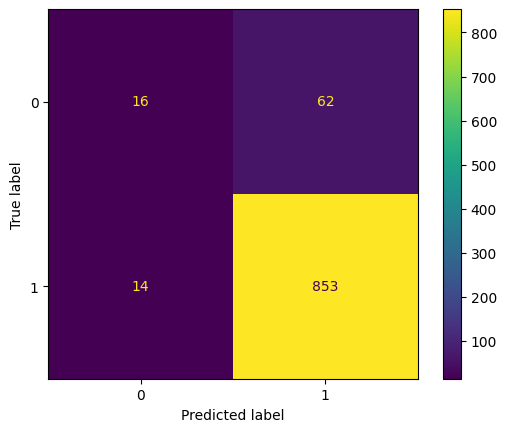

In [80]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

K fold cross validation

In [85]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9310366104483752
Standard Variance : 0.007238872362478027


applying grid search

In [86]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [87]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [88]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [89]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.88634301270417
Cross validation mean accuracy on test set : 92.16197822141561
Accuracy score for test set : 0.9195767195767196


In [90]:
#Saving the XGBoost classifier
joblib.dump(model_rf, open('randomforest.pkl', 'wb'))

XGBoost

In [91]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [92]:
from xgboost import XGBClassifier

In [93]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [94]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.971415607985481
Testing Accuracy : 0.9343915343915344


In [95]:
y_preds = model_xgb.predict(X_test)

In [96]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 31  47]
 [ 13 854]]


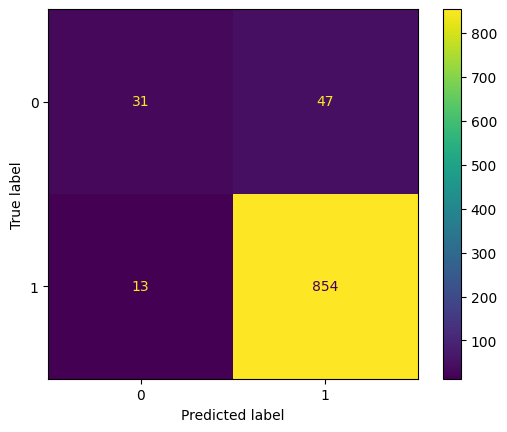

In [97]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [98]:
#Saving the XGBoost classifier
joblib.dump(model_xgb, open('model_xgb.pkl', 'wb'))

Decision tree

In [99]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [100]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9068783068783068


In [101]:
y_preds = model_dt.predict(X_test)

In [102]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 37  41]
 [ 90 777]]


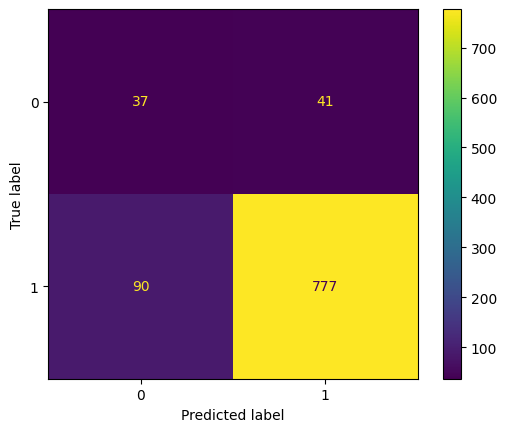

In [103]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [104]:
#Saving the XGBoost classifier
joblib.dump(model_xgb, open('decision_tree.pkl', 'wb'))

In [105]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback', 'length',
       'word_count', 'processed_text'],
      dtype='object')

In [106]:
data.head(15)

,rating,date,variation,verified_reviews,feedback,length,word_count,processed_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2,love
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197,38,sometim play game answer question correctli al...
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174,34,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,music
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1,174,32,receiv echo gift need anoth bluetooth someth p...
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1,367,75,without cellphon cannot use mani featur ipad s...
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221,40,think th one purchas work get one everi room h...
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,11,2,look great
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1,116,19,love listen song heard sinc childhood get news...


In [107]:
data.tail(15)

,rating,date,variation,verified_reviews,feedback,length,word_count,processed_text
3135,5,30-Jul-18,White Dot,I loved it does exactly what it says,1,36,8,love exactli say
3136,4,30-Jul-18,Black Dot,I used it to control my smart home devices. Wo...,1,56,11,use control smart home devic work great
3137,5,30-Jul-18,Black Dot,Very convenient,1,15,2,conveni
3138,5,30-Jul-18,White Dot,"""Este producto llegó y a la semana se quedó si...",1,100,19,est producto lleg la semana se qu sin olor per...
3139,5,30-Jul-18,White Dot,Easy to set up Ready to use in minutes.,1,39,9,easi set readi use minut
3140,4,30-Jul-18,White Dot,Barry,1,5,1,barri
3141,3,30-Jul-18,Black Dot,,1,1,0,
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1,117,22,three year old love good basic household task ...
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1,42,8,awesom devic wish bought one age ago
3144,5,30-Jul-18,Black Dot,love it,1,7,2,love


In [108]:
data['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [109]:
data[data['feedback']== 0]

,rating,date,variation,verified_reviews,feedback,length,word_count,processed_text
46,2,30-Jul-18,Charcoal Fabric,"""It's like Siri, in fact, Siri answers more ac...",0,165,32,like siri fact siri answer accur alexa see rea...
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53,12,sound terribl u want good music get bose
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18,3,much featur
162,1,30-Jul-18,Sandstone Fabric,"""Stopped working after 2 weeks ,didn't follow ...",0,89,14,stop work week follow command realli fun work
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20,3,sad joke worthless
...,...,...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120,22,echo dot respond us even talk unplug feel like...
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37,7,connect phone playlist
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240,42,neg product terribl sound qualiti massiv diffe...
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17,4,order
